### Ejemplo de una relación recíproca 
$Y≈ \frac{1}{θ_0​+θ_1​X}​(1+ϵ)$

que se linealiza como:

$\frac{1}{Y}​=θ_0​+θ_1​X+error$

​

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
df = pd.read_csv("dataset_A.csv")  
df.head()

,X,Y
0,0.530126,2.166378
1,0.638960,1.802296
2,0.739614,1.769520
3,0.780007,2.349009
4,0.896321,1.626364


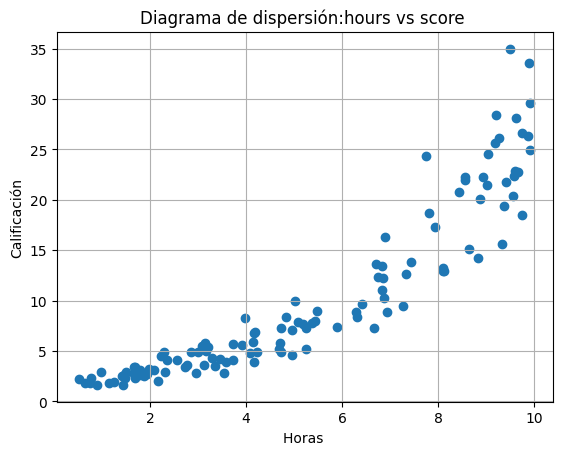

In [ ]:
plt.scatter(df["X"], df["Y"])
plt.xlabel("A")
plt.ylabel("B")
plt.title("Diagrama de dispersión:X vs Y ")
plt.grid(True)
plt.show()

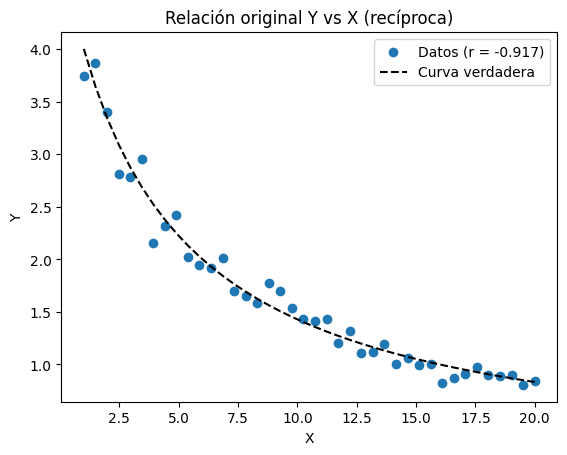

Correlación original entre X y Y: -0.917

Modelo lineal directo (Y ~ X) — se espera que sea inadecuado:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     200.6
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           9.66e-17
Time:                        17:15:19   Log-Likelihood:                -11.870
No. Observations:                  40   AIC:                             27.74
Df Residuals:                      38   BIC:                             31.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

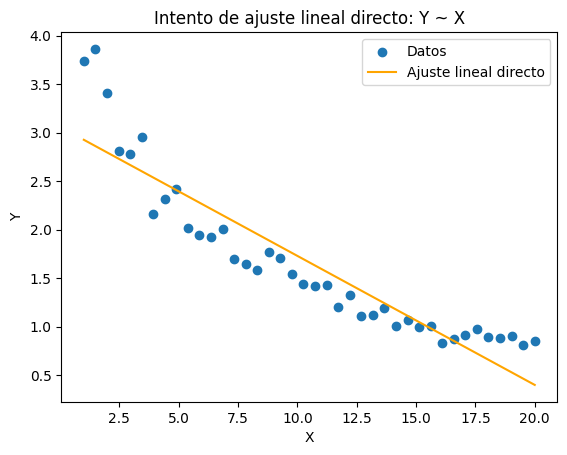

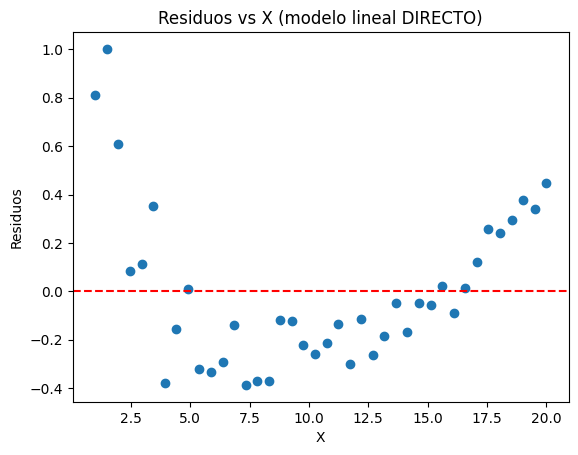

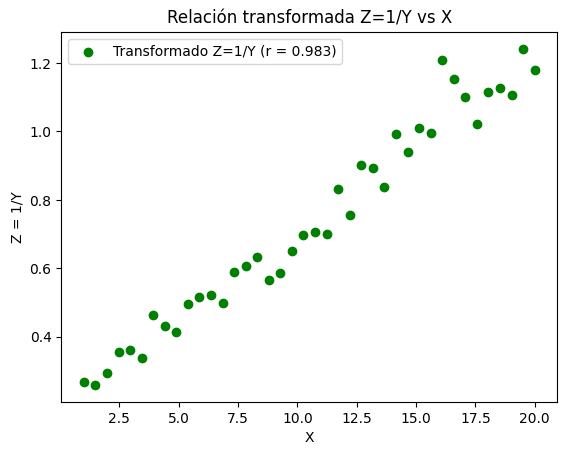

Correlación entre X y 1/Y: 0.983

Modelo transformado (Z=1/Y ~ X):

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1110.
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           9.86e-30
Time:                        17:15:20   Log-Likelihood:                 60.148
No. Observations:                  40   AIC:                            -116.3
Df Residuals:                      38   BIC:                            -112.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

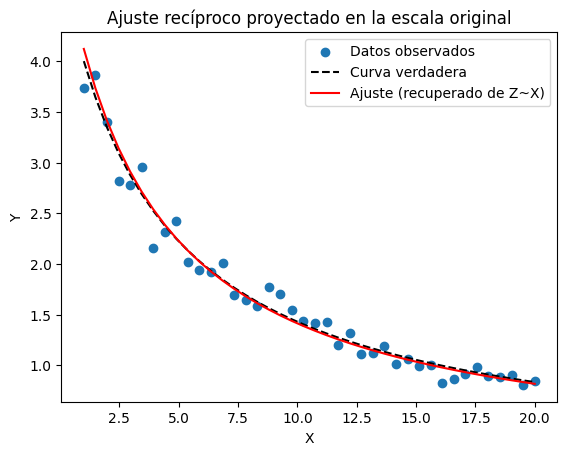

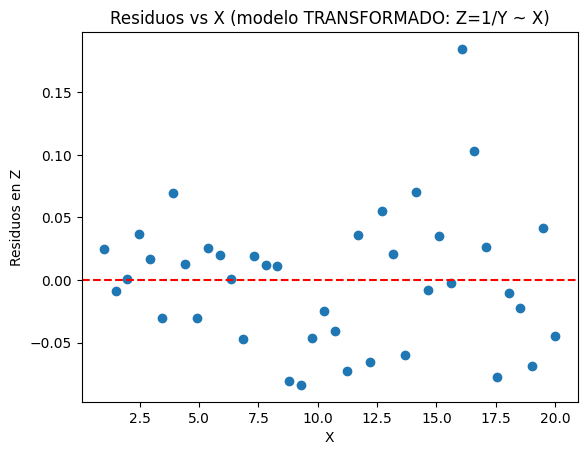

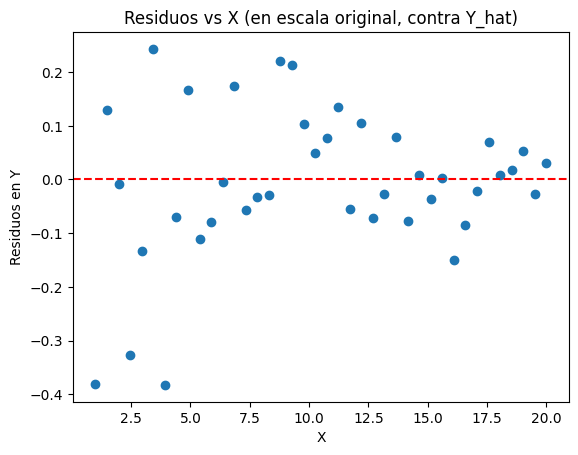


--- RESUMEN BREVE ---
r(X, Y)      = -0.917  (puede ser alto sin que la relación sea lineal)
r(X, 1/Y)    = 0.983  (tras transformación, relación linealizada)
Ajuste directo Y~X: residuos con patrón curvo (violación de linealidad).
Ajuste transformado 1/Y~X: residuos más aleatorios (linealidad razonable).
Parámetros recuperados cercanos a los verdaderos y curva ajustada adecuada.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr

# =========================================================
# 0) Simulación de datos (relación recíproca)
# =========================================================
np.random.seed(123)
n = 40
X = np.linspace(1, 20, n)

# Parámetros "verdaderos" del modelo recíproco: 1/Y = theta0 + theta1 * X
theta0_true = 0.20
theta1_true = 0.05

# Generamos Y = 1/(theta0 + theta1 X) con ruido multiplicativo para mantener positividad
sigma = 0.06  # nivel de ruido relativo
Y_true = 1.0 / (theta0_true + theta1_true * X)
Y = Y_true * (1 + np.random.normal(0, sigma, size=n))

# =========================================================
# 1) Dispersión original + r de Pearson
# =========================================================
r_orig, _ = pearsonr(X, Y)
plt.scatter(X, Y, label=f"Datos (r = {r_orig:.3f})")
plt.plot(X, Y_true, color="black", linestyle="--", label="Curva verdadera")
plt.title("Relación original Y vs X (recíproca)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
print(f"Correlación original entre X y Y: {r_orig:.3f}")

# =========================================================
# 2) Intento de ajuste lineal DIRECTO (sin transformar)
#    -> sirve para mostrar que NO se cumple linealidad
# =========================================================
X1 = sm.add_constant(X)
ols_direct = sm.OLS(Y, X1).fit()
print("\nModelo lineal directo (Y ~ X) — se espera que sea inadecuado:\n")
print(ols_direct.summary())

Y_pred_direct = ols_direct.predict(X1)

# Gráfica del ajuste directo
plt.scatter(X, Y, label="Datos")
plt.plot(X, Y_pred_direct, color="orange", label="Ajuste lineal directo")
plt.title("Intento de ajuste lineal directo: Y ~ X")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Residuos del ajuste directo: patrón curvo esperado
resid_direct = Y - Y_pred_direct
plt.scatter(X, resid_direct)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuos vs X (modelo lineal DIRECTO)")
plt.xlabel("X")
plt.ylabel("Residuos")
plt.show()

# =========================================================
# 3) Transformación recíproca: Z = 1/Y
#    -> linealiza: Z = theta0 + theta1 X + error
# =========================================================
Z = 1.0 / Y
r_trans, _ = pearsonr(X, Z)
plt.scatter(X, Z, label=f"Transformado Z=1/Y (r = {r_trans:.3f})", color="green")
plt.title("Relación transformada Z=1/Y vs X")
plt.xlabel("X")
plt.ylabel("Z = 1/Y")
plt.legend()
plt.show()
print(f"Correlación entre X y 1/Y: {r_trans:.3f}")

# =========================================================
# 4) Ajuste lineal en escala transformada: Z ~ X
# =========================================================
ols_trans = sm.OLS(Z, X1).fit()
print("\nModelo transformado (Z=1/Y ~ X):\n")
print(ols_trans.summary())

beta0_hat, beta1_hat = ols_trans.params  # estimadores de theta0, theta1 en esta parametrización
theta0_hat, theta1_hat = beta0_hat, beta1_hat

print(f"\nEstimaciones (escala original del modelo recíproco):")
print(f"  theta0 ≈ {theta0_hat:.4f} (verdadero: {theta0_true:.4f})")
print(f"  theta1 ≈ {theta1_hat:.4f} (verdadero: {theta1_true:.4f})")

# =========================================================
# 5) Curva ajustada en la escala original de Y
#    Y_hat = 1 / (theta0_hat + theta1_hat X)
# =========================================================
Y_hat = 1.0 / (theta0_hat + theta1_hat * X)

plt.scatter(X, Y, label="Datos observados")
plt.plot(X, Y_true, color="black", linestyle="--", label="Curva verdadera")
plt.plot(X, Y_hat, color="red", label="Ajuste (recuperado de Z~X)")
plt.title("Ajuste recíproco proyectado en la escala original")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# =========================================================
# 6) Diagnósticos de residuos (transformado y original)
#    - Residuos en la escala transformada: Z - (beta0 + beta1 X)
#    - Residuos en la escala original respecto a la curva recuperada
# =========================================================
Z_fitted = ols_trans.predict(X1)
resid_trans = Z - Z_fitted

plt.scatter(X, resid_trans)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuos vs X (modelo TRANSFORMADO: Z=1/Y ~ X)")
plt.xlabel("X")
plt.ylabel("Residuos en Z")
plt.show()

# (Opcional) Residuos en escala original usando la curva recuperada
resid_orig_from_trans = Y - Y_hat
plt.scatter(X, resid_orig_from_trans)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuos vs X (en escala original, contra Y_hat)")
plt.xlabel("X")
plt.ylabel("Residuos en Y")
plt.show()

# =========================================================
# 7) Resumen breve en consola
# =========================================================
print("\n--- RESUMEN BREVE ---")
print(f"r(X, Y)      = {r_orig:.3f}  (puede ser alto sin que la relación sea lineal)")
print(f"r(X, 1/Y)    = {r_trans:.3f}  (tras transformación, relación linealizada)")
print("Ajuste directo Y~X: residuos con patrón curvo (violación de linealidad).")
print("Ajuste transformado 1/Y~X: residuos más aleatorios (linealidad razonable).")
print("Parámetros recuperados cercanos a los verdaderos y curva ajustada adecuada.")
